In [267]:
%load_ext autoreload
%autoreload 2
import feature_extract
import sys
sys.path.append("..")
import torch
import psql_methods as psql
import pickle
import alchemy_methods as alc
from tqdm import tqdm
import numpy as np
import image_utils as imgs
import Openseas_Methods as opse
import multiprocessing
import pandas as pd
import feature_utils as feat
import matplotlib.pyplot as plt
import counterfeit_utils as cfu

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [269]:
der_lists = cfu.der_list_from_db()
columns = ['slug','derivative']
df1 = pd.DataFrame(der_lists,columns=columns)
cf_nums = cfu.get_counterfeit_db(slug=None)
columns = ['slug','cf_num']
df2 = pd.DataFrame(cf_nums,columns=columns)
merged_df = pd.merge(df1,df2, how='right',on='slug').query("cf_num>=20 and slug!='fluf'")


connection to server at "ada.cs.ubc.ca" (10.58.1.1), port 5432 failed: Connection refused
	Is the server running on that host and accepting TCP/IP connections?

connection to server at "ada.cs.ubc.ca" (10.58.1.1), port 5432 failed: Connection refused
	Is the server running on that host and accepting TCP/IP connections?



10323
(1, 10, 'neotokyopunkscollabs')
count    382395.000000
mean       4943.134408
std        3132.426148
min           1.000000
0.1%         16.000000
0.2%         16.000000
1%           67.000000
10%         737.000000
25%        2191.000000
50%        4703.000000
75%        7580.000000
max       10976.000000
dtype: float64
10976
(1, 38, '0xzuki')
count    324971.000000
mean       4970.534263
std        3221.671700
min           1.000000
0.1%          8.000000
0.2%         19.000000
1%           34.000000
10%         651.000000
25%        2057.000000
50%        4877.000000
75%        7648.000000
max       10975.000000
dtype: float64
10976
(1, 0, 'pepez-beanz')
count    609709.000000
mean       5047.304921
std        3160.425259
min           2.000000
0.1%          9.000000
0.2%         15.000000
1%           45.000000
10%         735.000000
25%        2357.000000
50%        4880.000000
75%        7758.000000
max       10976.000000
dtype: float64
9726
(1, 100, '0xapes-trilogy')
count

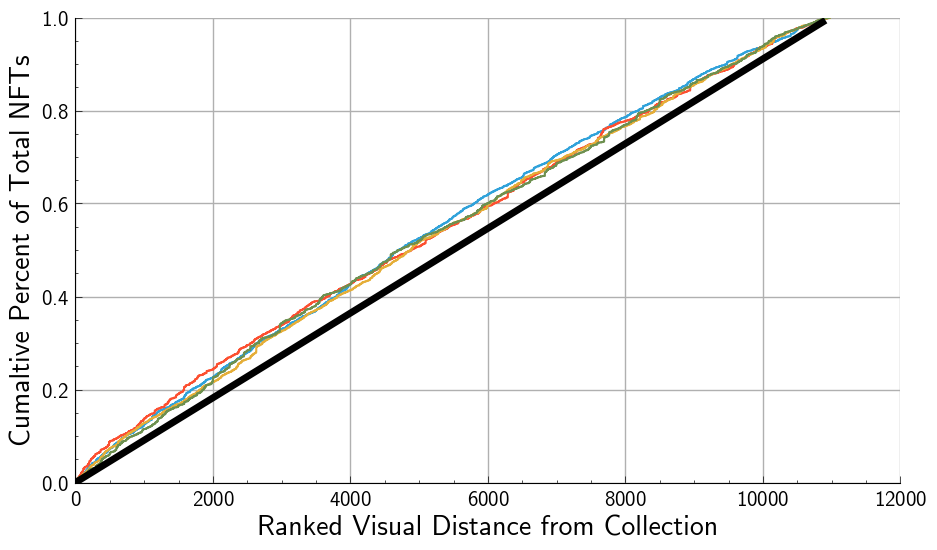

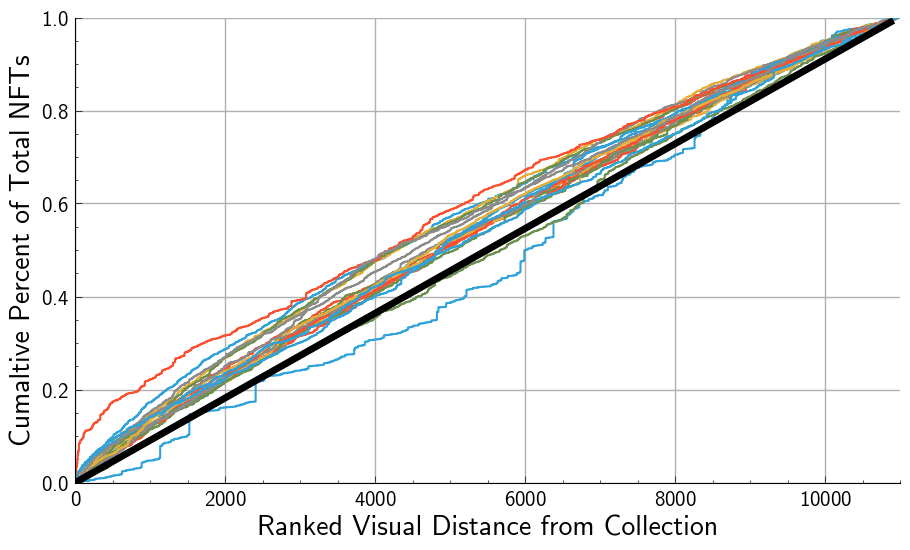

In [23]:
grouped = merged_df.groupby('slug')
percentiles_total = []
percentiles_tokens = []
plt.figure(figsize=(8, 6))
for slug,group in grouped:
    ders = group['derivative'].to_list()
    percentiles_total.append((slug,cfu.compute_overlap_cdf(slug,der_list = ders,xlim=11000,ylim=1,show=False,filter='')))
    # percentiles_tokens.append((slug,cfu.compute_overlap_cdf(slug,der_list = ders,xlim=12000,ylim=1,show=False,filter='one_token')))
plt.savefig('../paper_plots/full_scale_cdf_plot.pdf',   format="pdf", bbox_inches="tight")
plt.show()

In [19]:
plt.savefig('../paper_plots/small_scale_cdf_plot.pdf',  format="pdf", bbox_inches="tight")

In [220]:
percentiles_total

[('0n1-force',
  0             1
  1             1
  2             1
  3             1
  4             1
            ...  
  382390    10976
  382391    10976
  382392    10976
  382393    10976
  382394    10976
  Length: 382395, dtype: int64),
 ('azuki',
  0             1
  1             1
  2             1
  3             1
  4             1
            ...  
  324966    10975
  324967    10975
  324968    10975
  324969    10975
  324970    10975
  Length: 324971, dtype: int64),
 ('beanzofficial',
  0             2
  1             2
  2             2
  3             2
  4             2
            ...  
  609704    10976
  609705    10976
  609706    10976
  609707    10976
  609708    10976
  Length: 609709, dtype: int64),
 ('boredapeyachtclub',
  0             1
  1             1
  2             1
  3             1
  4             1
            ...  
  370801    10974
  370802    10974
  370803    10974
  370804    10976
  370805    10976
  Length: 370806, dtype: int64),
 ('cool-

In [233]:
with_nums_total = sorted([(x[0],x[1],cfu.get_counterfeit_db(x[0])[0][0]) for x in percentiles_total])
with_nums_tokens = sorted([(x[0],x[1],cfu.get_counterfeit_db(x[0])[0][0]) for x in percentiles_tokens])
with_nums_total

[('0n1-force',
  0             1
  1             1
  2             1
  3             1
  4             1
            ...  
  382390    10976
  382391    10976
  382392    10976
  382393    10976
  382394    10976
  Length: 382395, dtype: int64,
  50),
 ('azuki',
  0             1
  1             1
  2             1
  3             1
  4             1
            ...  
  324966    10975
  324967    10975
  324968    10975
  324969    10975
  324970    10975
  Length: 324971, dtype: int64,
  50),
 ('beanzofficial',
  0             2
  1             2
  2             2
  3             2
  4             2
            ...  
  609704    10976
  609705    10976
  609706    10976
  609707    10976
  609708    10976
  Length: 609709, dtype: int64,
  20),
 ('boredapeyachtclub',
  0             1
  1             1
  2             1
  3             1
  4             1
            ...  
  370801    10974
  370802    10974
  370803    10974
  370804    10976
  370805    10976
  Length: 370806, dtype

In [246]:
with_nums_total = sorted([(x[0],x[1],cfu.get_counterfeit_db(x[0])[0][0]) for x in percentiles_total])
with_nums_tokens = sorted([(x[0],x[1],cfu.get_counterfeit_db(x[0])[0][0]) for x in percentiles_tokens])
# totals = [(x[0],((x[1] < x[2]).sum())/len(x[1])) for x in with_nums]
avgs_total = [(x[0],((x[1] < x[2]).sum())/len(x[1]),(x[2]/10976)) for x in with_nums_total]
avgs_tokens = [(x[0],((x[1] < x[2]).sum())/len(x[1]),(x[2]/10976)) for x in with_nums_tokens]
df_1 = pd.DataFrame(avgs_total,columns=['Collection','% Knockoffs','Expected % Knockoffs'])
df_1['percentage'] = df_1['% Knockoffs']/df_1['Expected % Knockoffs']

df_2 = pd.DataFrame(avgs_tokens,columns=['Collection','% Knockoffs','Expected % Knockoffs'])
df_2['percentage'] = df_2['% Knockoffs']/df_2['Expected % Knockoffs']
# result_df.set_index('index', inplace=True)
# display(result_df)
# # result_df.sort_values('')
# result_df = result_df.transpose()
print(df_1['percentage'].mean())
print(df_2['percentage'].mean())
df_1.set_index('Collection', inplace=True)
df_2.set_index('Collection', inplace=True)
latex_code = df_1.to_latex()
# Print the LaTeX code
print(latex_code)
latex_code = df_2.to_latex()
# Print the LaTeX code
print(latex_code)

3.0688823174064717
2.752526944282065
\begin{tabular}{lrrr}
\toprule
 & % Knockoffs & Expected % Knockoffs & percentage \\
Collection &  &  &  \\
\midrule
0n1-force & 0.008190 & 0.004555 & 1.797975 \\
azuki & 0.010838 & 0.004555 & 2.379134 \\
beanzofficial & 0.002641 & 0.001822 & 1.449163 \\
boredapeyachtclub & 0.014169 & 0.010933 & 1.296003 \\
cool-cats-nft & 0.005058 & 0.001822 & 2.775968 \\
cryptopunks & 0.003321 & 0.013666 & 0.243008 \\
cyberkongz & 0.000299 & 0.002733 & 0.109341 \\
doodles-official & 0.007038 & 0.004555 & 1.544979 \\
genesis-creepz & 0.001483 & 0.001822 & 0.813819 \\
goblintownwtf & 0.007122 & 0.003644 & 1.954160 \\
hapeprime & 0.005157 & 0.001822 & 2.830206 \\
invisiblefriends & 0.008292 & 0.001822 & 4.550894 \\
kaiju-kingz & 0.010886 & 0.001822 & 5.974145 \\
karafuru & 0.004683 & 0.002733 & 1.713354 \\
mekaverse & 0.003467 & 0.001822 & 1.902906 \\
mfers & 0.007788 & 0.001822 & 4.273841 \\
milady & 0.083489 & 0.004555 & 18.327411 \\
nakamigos & 0.016841 & 0.006378

In [230]:
with_nums_total = sorted([(x[0],x[1],cfu.get_counterfeit_db(x[0])[0][0]) for x in percentiles_total])
with_nums_tokens = sorted([(x[0],x[1],cfu.get_counterfeit_db(x[0])[0][0]) for x in percentiles_tokens])
# totals = [(x[0],((x[1] < x[2]).sum())/len(x[1])) for x in with_nums]
avgs_total = [(x[0],((x[1] < x[2]).sum())/len(x[1]) for x in with_nums_total]
avgs_tokens = [(x[0],((x[1] < x[2]).sum())/len(x[1]) for x in with_nums_tokens]
avgs_total = [(x[0],((x[1] < x[2]).sum())/len(x[1])/(x[2]/10976)) for x in with_nums_total]
avgs_tokens = [(x[0],((x[1] < x[2]).sum())/len(x[1])/(x[2]/10976)) for x in with_nums_tokens]
total_dict = dict(avgs_total)
token_dict = dict(avgs_tokens)
result_df = pd.DataFrame.from_records([token_dict,total_dict])
result_df['index'] = ['Total NFTs','Unique NFTs']
result_df.set_index('index', inplace=True)
display(result_df)
# result_df.sort_values('')
result_df = result_df.transpose()
latex_code = result_df.to_latex()
# Print the LaTeX code
print(latex_code)

,0n1-force,azuki,beanzofficial,boredapeyachtclub,cool-cats-nft,cryptopunks,cyberkongz,doodles-official,fluf,genesis-creepz,...,invisiblefriends,kaiju-kingz,karafuru,mekaverse,mfers,milady,nakamigos,proof-moonbirds,pudgypenguins,world-of-women-nft
index,,,,,,,,,,,,,,,,,,,,,
Total NFTs,1.349883,1.352160,1.182493,0.988743,3.131499,0.566367,0.242115,1.673803,2.023996,1.079041,...,4.859641,2.678233,1.928151,2.320917,4.004518,17.081503,1.468159,0.690557,1.960929,5.147172
Unique NFTs,1.797975,2.379134,1.449163,1.296003,2.775968,0.243008,0.109341,1.544979,1.248797,0.813819,...,4.550894,5.974145,1.713354,1.902906,4.273841,18.327411,2.640671,0.805540,2.382564,4.681447


\begin{tabular}{lrr}
\toprule
index & Total NFTs & Unique NFTs \\
\midrule
0n1-force & 1.349883 & 1.797975 \\
azuki & 1.352160 & 2.379134 \\
beanzofficial & 1.182493 & 1.449163 \\
boredapeyachtclub & 0.988743 & 1.296003 \\
cool-cats-nft & 3.131499 & 2.775968 \\
cryptopunks & 0.566367 & 0.243008 \\
cyberkongz & 0.242115 & 0.109341 \\
doodles-official & 1.673803 & 1.544979 \\
fluf & 2.023996 & 1.248797 \\
genesis-creepz & 1.079041 & 0.813819 \\
goblintownwtf & 1.436148 & 1.954160 \\
hapeprime & 2.661033 & 2.830206 \\
invisiblefriends & 4.859641 & 4.550894 \\
kaiju-kingz & 2.678233 & 5.974145 \\
karafuru & 1.928151 & 1.713354 \\
mekaverse & 2.320917 & 1.902906 \\
mfers & 4.004518 & 4.273841 \\
milady & 17.081503 & 18.327411 \\
nakamigos & 1.468159 & 2.640671 \\
proof-moonbirds & 0.690557 & 0.805540 \\
pudgypenguins & 1.960929 & 2.382564 \\
world-of-women-nft & 5.147172 & 4.681447 \\
\bottomrule
\end{tabular}



In [97]:
slugs = merged_df['slug'].unique()
owner_dates = cfu.get_all_ownershipdates()
owner_dates.rename(columns={'wallet': 'address'}, inplace=True)
counts = []
dead_slugs = ['golbintownwtf','invisiblefriends']
for slug in slugs[:1]:
    slug = 'pudgypenguins'
    overlap = cfu.get_overlaps(slug).drop_duplicates(subset=['slug','address'])
    merged_overlaps = pd.merge(owner_dates,overlap,on=['address','slug'])
    der_list = cfu.der_list_from_db(slug)
    main_dates = owner_dates.query(f"slug=='{slug}'")
    complete_df = pd.merge(main_dates,merged_overlaps,on='address',suffixes=['_orig','']).query("sorted_order<100")
    complete_df = complete_df.query(f'slug not in {der_list}')
    complete_df['timestamp'] = complete_df['timestamp'].astype(int)
    complete_df['timestamp_orig'] = complete_df['timestamp_orig'].astype(int)
    filtered_df = complete_df[complete_df['timestamp'] < complete_df['timestamp_orig']]
    print(slug,len(filtered_df),len(complete_df))
    # display(complete_df)
    if slug not in dead_slugs:
        counts.append((slug,len(filtered_df),len(complete_df)))


pudgypenguins 125 510


In [96]:
averages = [x[1]/(x[2]) for x in counts[:-1] if x[1]!=88]
print(averages)
print(sum(averages)/len(averages))

[0.3333333333333333, 0.41317365269461076, 0.1889763779527559, 0.3580645161290323, 0.21621621621621623, 0.5714285714285714, 0.5063829787234042, 0.21951219512195122, 1.0, 0.5918367346938775, 0.5166163141993958, 0.19047619047619047, 0.22627737226277372, 0.3333333333333333, 0.18319928507596067, 0.44545454545454544, 0.5121951219512195, 0.24509803921568626, 0.7342007434944238, 0.3385093167701863]
0.40621424192637345


In [105]:
filtered_df['slug'].value_counts()

slug
sappy-seals                          108
fortune-friends-club-official-nft      4
foxyfamnft                             4
pudgytown                              2
thealiendoogle                         2
stakedseals                            2
coolpenguinswtf                        1
hushpuppiesnft                         1
pudgy-pandas-official                  1
Name: count, dtype: int64

In [13]:
len(img.get_immediate_subdirectories('expanded_images/val'))

1264

In [73]:
cfu.der_list_to_db('sappy-seals',['stakedseals'])

In [4]:
intervals = cfu.compute_all_intervals('cool-cats-nft',1)[0]
intervals
top_knocks = []
intervals = sorted(intervals, key=lambda x:x[1],reverse=True)
for interval in intervals[:5]:
    print(interval[0])
    top_knocks.append(interval[0])

alienfrensnft
cryptomories
wonderpals
coolmonkes
fishyfam


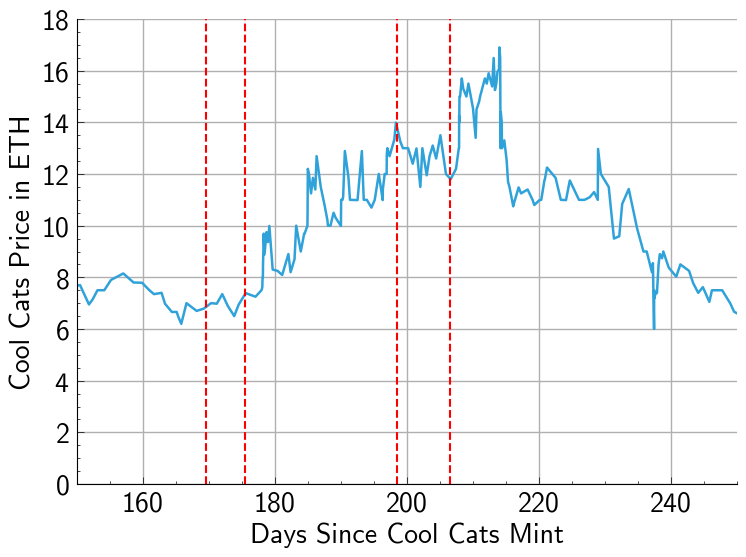

In [7]:
cfu.plot_price_chart_smooth('cool-cats-nft',top_knocks, 'cool_cats_small_window')

In [266]:
cfu.count_overlaps('world-of-women-nft',)

,slug,sorted_order,row_count
10691,world-of-women-galaxy,1,8998
708,asian-identity-collection,2,0
10238,universeofwomen,3,1524
10704,wow-pixies-v2,4,1190
5530,lovelywomens-world,5,0
...,...,...,...
5680,marfa2022,10972,1
7895,rare-earth-metals,10973,1
2857,dolce-gabbana-dgfamily-glass,10974,70
4713,immortal-pass,10975,29
